### TITANIC DATASET -> TREE MODEL


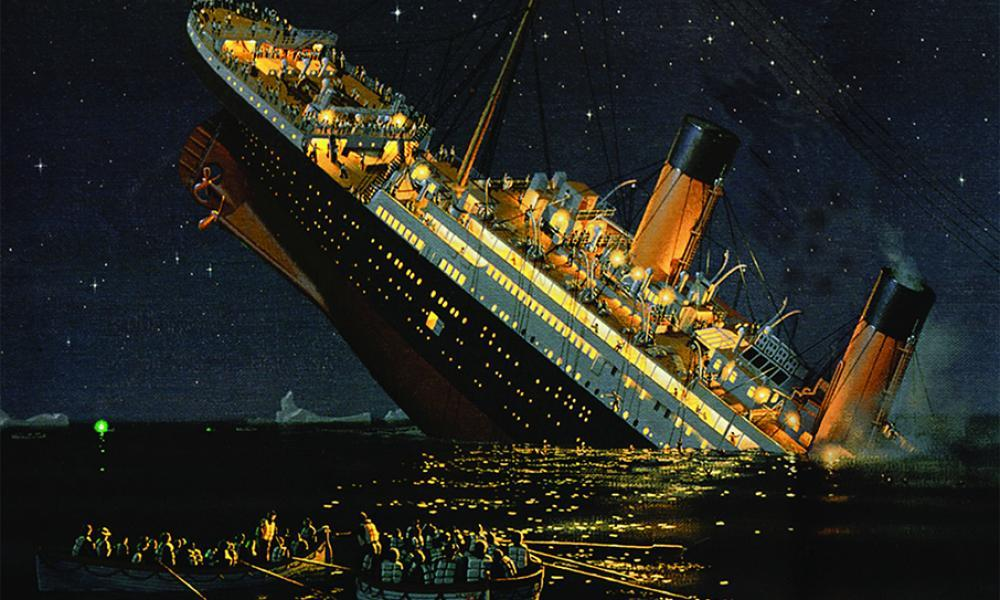

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum().sort_values(ascending= False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [4]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [5]:
df.isna().sum().sort_values(ascending= False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [6]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
df.Embarked.mode()

0    S
dtype: object

In [8]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [9]:
df.isna().sum().sort_values(ascending= False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [10]:
plt.style.use('classic')

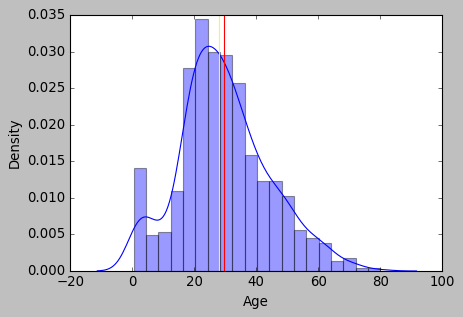

In [11]:
plt.figure(figsize=(6,4))
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color = 'red')
plt.axvline(df.Age.median(), color = 'yellow')
plt.show()

In [12]:
df.Age.skew()

0.38910778230082704

In [13]:
df.Age.fillna(df.Age.mean(),inplace = True)

In [14]:
df.isna().sum().sort_values(ascending= False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
df['FamilySize'] = df.SibSp + df['Parch'] + 1

In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [18]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.000000,0,0,4135,9.5875,S,1
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.000000,0,1,111361,57.9792,C,2
109,110,1,3,"Moran, Miss. Bertha",female,29.699118,1,0,371110,24.1500,Q,2
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.000000,1,0,226875,26.0000,S,2
154,155,0,3,"Olsen, Mr. Ole Martin",male,29.699118,0,0,Fa 265302,7.3125,S,1


In [19]:
df['GenderClass'] = df.apply(lambda x : 'child' if x['Age'] < 15 else x['Sex'], axis = 1)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,GenderClass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [21]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
FamilySize       int64
GenderClass     object
dtype: object

In [22]:
df.GenderClass.value_counts()

male      538
female    275
child      78
Name: GenderClass, dtype: int64

In [23]:
df.groupby(['GenderClass']).mean()[['Survived']]

,Survived
GenderClass,
child,0.576923
female,0.760000
male,0.163569


In [24]:
df.groupby(['Sex']).mean()[['Survived']]

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

### Goal: To predict the survival of passengers

In [26]:
df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'GenderClass'],
      dtype='object')

In [28]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,GenderClass
0,0,3,male,22.0,1,0,7.2500,S,2,male
1,1,1,female,38.0,1,0,71.2833,C,2,female
2,1,3,female,26.0,0,0,7.9250,S,1,female


In [29]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.065997
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.248512
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.248512,0.890712,0.783111,0.217138,1.000000


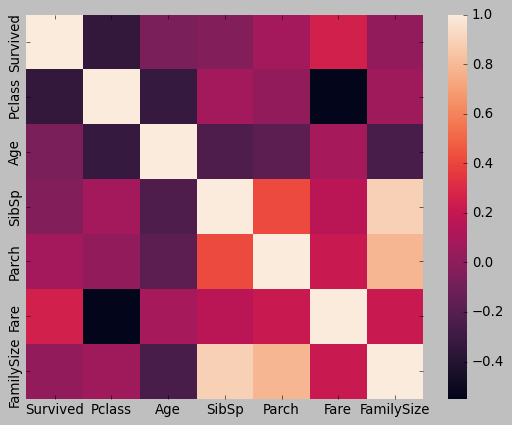

In [30]:
sns.heatmap(df.corr())
plt.show()

In [31]:
df.drop(['Sex','SibSp','Parch'], axis = 1, inplace= True)

In [32]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'FamilySize',
       'GenderClass'],
      dtype='object')

In [33]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,FamilySize,GenderClass
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


In [34]:
df = pd.get_dummies(df, columns = [ 'Embarked', 'GenderClass'], drop_first= True)

In [35]:
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,0,0,1,0
2,1,3,26.0,7.9250,1,0,1,1,0
3,1,1,35.0,53.1000,2,0,1,1,0
4,0,3,35.0,8.0500,1,0,1,0,1


In [36]:
X = df.loc[:, df.columns != 'Survived']

In [37]:
y = df.Survived

In [38]:
X.head()

,Pclass,Age,Fare,FamilySize,Embarked_Q,Embarked_S,GenderClass_female,GenderClass_male
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,0,0,1,0
2,3,26.0,7.9250,1,0,1,1,0
3,1,35.0,53.1000,2,0,1,1,0
4,3,35.0,8.0500,1,0,1,0,1


In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

In [41]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

In [42]:
from ast import mod
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

from sklearn.tree import export_graphviz

import pydotplus

from Ipython.display import Image

dot_tree = export_graphviz(decision_tree = model, filled=True,rounded = True, special_characters = True, 
feature_names = X.columns)

graph = pydotplus.graph_from_dot_data(dot_tree)

Image(graph.creat_png())

In [43]:
from sklearn import tree
print(tree.export_text(model))

|--- feature_7 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 28.86
|   |   |   |--- feature_2 <= 28.23
|   |   |   |   |--- feature_1 <= 21.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  21.50
|   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |--- feature_1 <= 25.50
|   |   |   |   |   |   |   |--- feature_2 <= 13.75
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  13.75
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  25.50
|   |   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_3 >  1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  27.50
|   |   |   |   |   |   |--- feature_1 <= 37.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  37.00
|   |   |   |   |   |   |   |--- feature_1 <= 39.00
|   

[Text(200.07196215139442, 373.89473684210526, 'X[7] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(83.36653386454184, 353.6842105263158, 'X[0] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]'),
 Text(33.59362549800797, 333.4736842105263, 'X[2] <= 28.856\ngini = 0.089\nsamples = 150\nvalue = [7, 143]'),
 Text(25.689243027888445, 313.2631578947369, 'X[2] <= 28.231\ngini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(21.737051792828687, 293.0526315789474, 'X[1] <= 21.5\ngini = 0.155\nsamples = 59\nvalue = [5, 54]'),
 Text(17.784860557768923, 272.8421052631579, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(25.689243027888445, 272.8421052631579, 'X[1] <= 27.5\ngini = 0.206\nsamples = 43\nvalue = [5, 38]'),
 Text(15.808764940239044, 252.63157894736844, 'X[1] <= 25.5\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(7.904382470119522, 232.42105263157896, 'X[2] <= 13.75\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(3.952191235059761, 212.21052631578948, 'gi

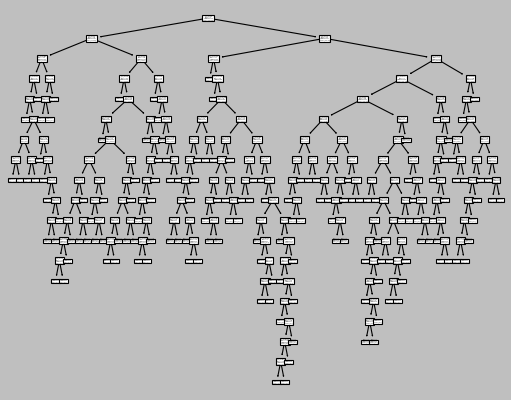

In [44]:
from sklearn import tree
tree.plot_tree(model)

In [45]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
#train and testing accuracy
accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test)

(0.9873595505617978, 0.776536312849162)

## the above model is Overfitting

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[90, 16],
       [24, 49]], dtype=int64)

In [49]:
cm = pd.DataFrame(cm)
cm.columns = ['Predicted Died', 'Predicted Survived']
cm.index = ['Actual Died', 'Actual Survived']
cm

,Predicted Died,Predicted Survived
Actual Died,90,16
Actual Survived,24,49


In [50]:
# GridSearchCV

param_dist = {  'criterion' : ['gini', 'entropy'],
             'max_depth': [1,2,3,4,5,6,7,None]}

param_dist

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}

In [51]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model, 
                    param_grid= param_dist, cv=10, 
                    n_jobs = -1, verbose=True)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None]},
             verbose=True)

In [52]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [53]:
grid.best_score_

0.8358176838810643

In [54]:
y_pred_train_grid = grid.predict(X_train)
y_pred_test_grid = grid.predict(X_test)

In [55]:
#train and testing accuracy

accuracy_score(y_train, y_pred_train_grid), accuracy_score(y_test,y_pred_test_grid)

(0.8384831460674157, 0.8044692737430168)

In [56]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=0, criterion= 'gini', max_depth= 3 )
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

[Text(248.0, 336.0, 'X[7] <= 0.5\ngini = 0.47\nsamples = 712\nvalue = [443, 269]'),
 Text(124.0, 240.0, 'X[0] <= 2.5\ngini = 0.398\nsamples = 281\nvalue = [77, 204]'),
 Text(62.0, 144.0, 'X[2] <= 28.856\ngini = 0.089\nsamples = 150\nvalue = [7, 143]'),
 Text(31.0, 48.0, 'gini = 0.18\nsamples = 60\nvalue = [6, 54]'),
 Text(93.0, 48.0, 'gini = 0.022\nsamples = 90\nvalue = [1, 89]'),
 Text(186.0, 144.0, 'X[3] <= 4.5\ngini = 0.498\nsamples = 131\nvalue = [70, 61]'),
 Text(155.0, 48.0, 'gini = 0.483\nsamples = 98\nvalue = [40, 58]'),
 Text(217.0, 48.0, 'gini = 0.165\nsamples = 33\nvalue = [30, 3]'),
 Text(372.0, 240.0, 'X[0] <= 1.5\ngini = 0.256\nsamples = 431\nvalue = [366, 65]'),
 Text(310.0, 144.0, 'X[2] <= 26.144\ngini = 0.447\nsamples = 95\nvalue = [63, 32]'),
 Text(279.0, 48.0, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(341.0, 48.0, 'gini = 0.463\nsamples = 88\nvalue = [56, 32]'),
 Text(434.0, 144.0, 'X[1] <= 32.25\ngini = 0.177\nsamples = 336\nvalue = [303, 33]'),
 Text(403.0,

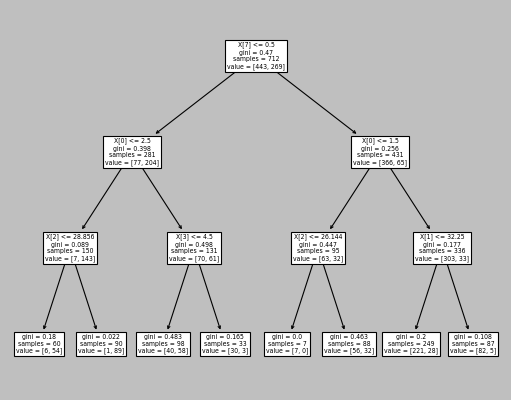

In [57]:
from sklearn import tree
tree.plot_tree(model1)

### ACCURACY SCORE OF TRAIN AND TEST

#### (TRAIN -> 0.8328651685393258, TEST -> 0.8212290502793296)